In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

/Users/danielmpfeffer/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# 1984:Q1 to 2015:Q4
start = datetime.datetime(1984, 10, 1)
end = datetime.datetime(2019, 12, 31)

# Quarterly U.S. real GDP from the FRED
ts = web.DataReader(['GPDI', 'GDP'], 'fred', start, end)

y = pd.DataFrame({'log_inv': np.log(ts['GPDI']),
                  'log_gdp':np.log(ts['GDP'])})

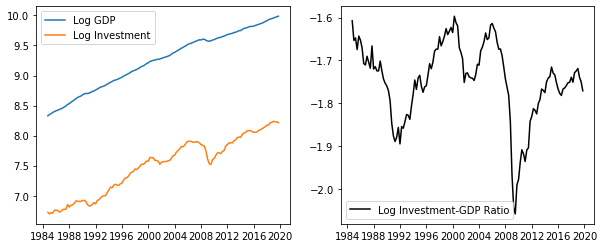

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(y['log_gdp'], label='Log GDP')
ax1.plot(y['log_inv'], label='Log Investment')
ax1.legend()

ax2.plot(y['log_inv'] - y['log_gdp'], 'k', label='Log Investment-GDP Ratio')
ax2.legend()

plt.savefig('macro-series') 

In [4]:
from statsmodels.tsa.api import VAR, VECM

# VECM model
vecm_mod = VECM(y, k_ar_diff=3, deterministic='co',
                coint_rank=1, freq='QS')
vecm_res = vecm_mod.fit()
print(vecm_res.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation log_inv
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2864      0.104     -2.741      0.006      -0.491      -0.082
L1.log_inv    -0.1127      0.112     -1.008      0.314      -0.332       0.107
L1.log_gdp     2.6836      0.561      4.784      0.000       1.584       3.783
L2.log_inv     0.0597      0.112      0.531      0.596      -0.161       0.280
L2.log_gdp     1.0939      0.611      1.792      0.073      -0.103       2.291
L3.log_inv     0.0442      0.105      0.422      0.673      -0.161       0.250
L3.log_gdp    -0.7267      0.610     -1.191      0.234      -1.923       0.469
Det. terms outside the coint. relation & lagged endog. parameters for equation log_gdp
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

In [5]:
vecm_res.alpha @ vecm_res.beta.T

array([[-0.08031444,  0.09338506],
       [ 0.00586197, -0.00681596]])

In [6]:
# VAR model
var_mod = VAR(y, freq='QS')
var_res = var_mod.fit(4)

print(var_res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 24, May, 2020
Time:                     17:19:17
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -17.9799
Nobs:                     137.000    HQIC:                  -18.2076
Log likelihood:           887.113    FPE:                1.05922e-08
AIC:                     -18.3635    Det(Omega_mle):     9.32653e-09
--------------------------------------------------------------------
Results for equation log_inv
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.259575         0.108354           -2.396           0.017
L1.log_inv         0.806987         0.127685            6.320           0.000
L1.log_gdp         2.669101         0.593113            4.500         

In [7]:
# VAR implied by VECM 
vecm_res.var_rep

array([[[ 0.80699271,  2.77703376],
        [ 0.00438676,  1.31174879]],

       [[ 0.17234468, -1.58970261],
        [ 0.01144681, -0.16725182]],

       [[-0.01545223, -1.82067235],
        [-0.01730541, -0.14673675]],

       [[-0.0441996 ,  0.72672625],
        [ 0.00733381, -0.00457618]]])

In [8]:
vecm_forecast = np.vstack([y.values, vecm_res.predict(40)])
var_forecast = np.vstack([y.values, var_res.forecast(y.values, steps=40)])

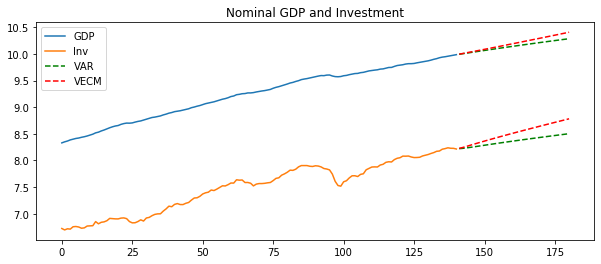

In [9]:
x = [i for i in range(len(vecm_forecast))]

plt.figure(figsize=(10,4))

# Historical Data
plt.plot(x[:141], var_forecast[:141,1], label='GDP')
plt.plot(x[:141], vecm_forecast[:141,0], label='Inv')

# GDP Forecast
plt.plot(x[141:], var_forecast[141:,1], 'g--')
plt.plot(x[141:], vecm_forecast[141:,1], 'r--')

# Investment Forecast
plt.plot(x[141:], var_forecast[141:,0], 'g--', label='VAR')
plt.plot(x[141:], vecm_forecast[141:,0], 'r--', label='VECM')

plt.legend()
plt.title('Nominal GDP and Investment')
plt.savefig('q2-nominal')

In [10]:
# Quarterly U.S. real GDP from the FRED
ts = web.DataReader(['GPDIC1', 'GDPC1'], 'fred', start, end)
    
x = pd.DataFrame({'log_inv': np.log(ts['GPDIC1']),
                  'log_gdp':np.log(ts['GDPC1'])})

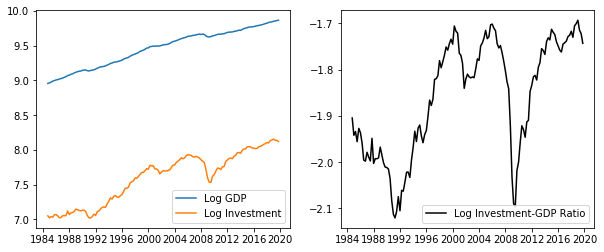

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(x['log_gdp'], label='Log GDP')
ax1.plot(x['log_inv'], label='Log Investment')
ax1.legend()

ax2.plot(x['log_inv'] - x['log_gdp'], 'k', label='Log Investment-GDP Ratio')
ax2.legend()

plt.savefig('real-macro-series') 

In [12]:
# Real VECM model
rvecm_mod = VECM(x, k_ar_diff=3, deterministic='co',
                coint_rank=1, freq='QS')
rvecm_res = rvecm_mod.fit()
print(vecm_res.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation log_inv
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2864      0.104     -2.741      0.006      -0.491      -0.082
L1.log_inv    -0.1127      0.112     -1.008      0.314      -0.332       0.107
L1.log_gdp     2.6836      0.561      4.784      0.000       1.584       3.783
L2.log_inv     0.0597      0.112      0.531      0.596      -0.161       0.280
L2.log_gdp     1.0939      0.611      1.792      0.073      -0.103       2.291
L3.log_inv     0.0442      0.105      0.422      0.673      -0.161       0.250
L3.log_gdp    -0.7267      0.610     -1.191      0.234      -1.923       0.469
Det. terms outside the coint. relation & lagged endog. parameters for equation log_gdp
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

In [13]:
rvecm_res.alpha @ rvecm_res.beta.T

array([[-0.13300579,  0.20353502],
       [ 0.00299607, -0.00458481]])

In [14]:
# Real VAR model
rvar_mod = VAR(x, freq='QS')
rvar_res = var_mod.fit(4)

print(rvar_res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 24, May, 2020
Time:                     17:19:19
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -17.9799
Nobs:                     137.000    HQIC:                  -18.2076
Log likelihood:           887.113    FPE:                1.05922e-08
AIC:                     -18.3635    Det(Omega_mle):     9.32653e-09
--------------------------------------------------------------------
Results for equation log_inv
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.259575         0.108354           -2.396           0.017
L1.log_inv         0.806987         0.127685            6.320           0.000
L1.log_gdp         2.669101         0.593113            4.500         

In [15]:
# VAR implied by (real) VECM 
rvecm_res.var_rep

array([[[ 6.94272588e-01,  3.17228558e+00],
        [ 1.34653452e-03,  1.26945500e+00]],

       [[ 9.89694268e-02, -8.60336939e-01],
        [ 4.06557213e-03, -5.15495343e-02]],

       [[ 1.00099818e-01, -2.28294690e+00],
        [-1.09789605e-02, -2.27148616e-01]],

       [[-2.63476193e-02,  1.74533287e-01],
        [ 8.56292815e-03,  4.65834312e-03]]])

In [16]:
rvecm_forecast = np.vstack([x.values, rvecm_res.predict(40)])
rvar_forecast = np.vstack([x.values, rvar_res.forecast(x.values, steps=40)])

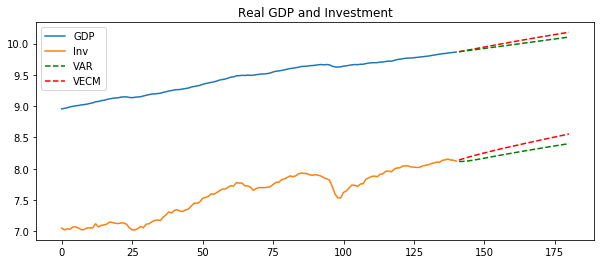

In [17]:
rx = [i for i in range(len(rvecm_forecast))]

plt.figure(figsize=(10,4))

plt.plot(rx[:141], rvar_forecast[:141,1],  label='GDP')
plt.plot(rx[:141], rvecm_forecast[:141,0], label='Inv')

plt.plot(rx[141:], rvar_forecast[141:,0], 'g--', label='VAR')
plt.plot(rx[141:], rvecm_forecast[141:,0], 'r--', label='VECM')

plt.plot(rx[141:], rvar_forecast[141:,1], 'r--')
plt.plot(rx[141:], rvecm_forecast[141:,1], 'g--')

plt.legend()
plt.title('Real GDP and Investment')

plt.savefig('q2-real')